In [ ]:
import pandas as pd
data = pd.read_excel(r"path to transformed file")

In [3]:
pd.options.display.max_columns = None
responded = data.loc[data['filter'] == 'no',]
data.columns

Index(['rec_id', 'Num_Successes', 'Num_Failures', 'sex(numeric)',
       'Age squared', 'Native check(native_1/non_native_0)',
       'experience_new_cleanup', 'lg salary', 'Direct Yes/No', 'lang_name',
       'interviews_count', 'employees_needed', 'filter', 'result', 'sample',
       'lang_1_grade', 'lang_2_grade', 'Languages zusammen', 'lang_grade',
       'Average grade of spoken languages',
       'Average score of other languages (not lang_name)', 'result_lag',
       'available_to_start_bin', 'lang_1_bin',
       'Number of languages spoken_bin', 'Nationality / Native_bin'],
      dtype='object')

In [ ]:
responded = responded.sort_values(['candidate_id', 'year_presented','month_presented','monthday_presented'], ascending=[True,True,True,True])

In [ ]:
import numpy as np

responded['result_lag'] = np.nan
responded['result_lag']

In [77]:
responded['candidate_id'].shift() 
responded['result'] = responded['result'].fillna(0)

In [79]:
responded['result_lag'] = responded.loc[responded['candidate_id'].shift(-1)==responded['candidate_id'],'result']
responded['result_lag'] = responded['result_lag'].shift()

In [1]:
responded
responded.describe()

NameError: name 'responded' is not defined

In [6]:
responded.corr()

responded.corr().to_excel(r'path to document location')

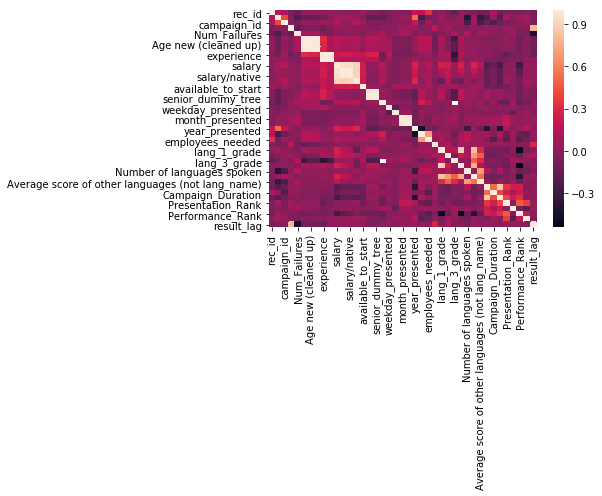

In [145]:
import seaborn as sns
sns.heatmap(responded[['rec_id', 'candidate_id', 'campaign_id', 'Num_Successes','Num_Failures', 'database', 'sex', 'age_calc', 'Age new (cleaned up)',
       'Age squared', 'Nationality', 'Nationality category', 'Native check',       'Nationality / Native', 'experience', 'experience_new_cleanup',       'salary', 'salary_new_cleanup', 'salary/native',       'salary per 1 lg grade', 'available_to_start', 'source_name',       'source_name by group', 'grade_name', 'senior_dummy_logit',      'senior_dummy_tree', 'wtime_name', 'position_type', 'employer_name',       'lang_name', 'technical_position', 'lead', 'contactp_name',     'weekday_presented', 'monthday_presented', 'month_presented',       'quarter_presented', 'year_presented', 'interviews_count','employees_needed', 'filter', 'result', 'sample', 'lang_1','lang_1_grade', 'lang_2', 'lang_2_grade', 'lang_3', 'lang_3_grade','lang_grade', 'Number of languages spoken', 'Average grade of spoken languages','Average score of other languages (not lang_name)', 'Position_Duration',
       'Campaign_Duration', 'Position_Duration_TILE10', 'Presentation_Rank','Days_Prev_Candidate', 'Days_Prev_Candidate_TILE10', 'Performance_Rank','Time_Perf_Rank', 'result_lag']].corr())


In [85]:
responded.columns

Index(['rec_id', 'candidate_id', 'campaign_id', 'Num_Successes',
       'Num_Failures', 'database', 'sex', 'age_calc', 'Age new (cleaned up)',
       'Age squared', 'Nationality', 'Nationality category', 'Native check',
       'Nationality / Native', 'experience', 'experience_new_cleanup',
       'salary', 'salary_new_cleanup', 'salary/native',
       'salary per 1 lg grade', 'available_to_start', 'source_name',
       'source_name by group', 'grade_name', 'senior_dummy_logit',
       'senior_dummy_tree', 'wtime_name', 'position_type', 'employer_name',
       'lang_name', 'technical_position', 'lead', 'contactp_name',
       'weekday_presented', 'monthday_presented', 'month_presented',
       'quarter_presented', 'year_presented', 'interviews_count',
       'employees_needed', 'filter', 'result', 'sample', 'lang_1',
       'lang_1_grade', 'lang_2', 'lang_2_grade', 'lang_3', 'lang_3_grade',
       'lang_grade', 'Arabic', 'Chinese', 'Czech', 'Dutch', 'English',
       'Estonian', 'French

In [89]:
responded['database'].value_counts()

local       1361
external      37
Name: database, dtype: int64

In [130]:
pd.crosstab(responded['result_lag'], responded.result,margins=True).apply(lambda r: r/r.sum(), axis=1)

result,0.0,1.0,All
result_lag,,,
0.0,0.434240,0.065760,0.5
1.0,0.283133,0.216867,0.5
All,0.410305,0.089695,0.5


In [114]:
# get some more data stats to decide what to do with the field
pd.crosstab(responded['lang_1'], responded.result,margins=True).to_excel(r'C:\Users\Thea\Desktop\Professional Development\Summer School 2019\Lannguages.xlsx')

In [148]:
data.groupby('Native check')['salary_new_cleanup'].mean()

Native check
Non-native to the position    8610.170270
Position native speaker       9044.402201
Name: salary_new_cleanup, dtype: float64

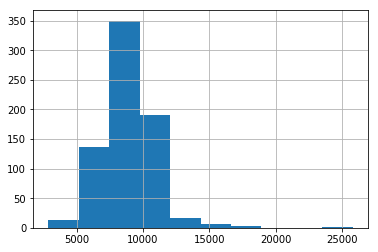

In [158]:
responded['salary'].hist()